https://github.com/aydanomachado/mlclass/tree/master/03_Validation

Dicentes:
- João Pedro Nunes
- Elias Nogueira
- Derek Alves


Tarefas:

▶ Qual classificador usar?

▶ Qual algoritmo de validação usar?

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [ ]:
df = pd.read_csv("/content/abalone_dataset.csv")
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
0,M,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.2400,3
1,I,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.1660,1
2,I,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1
3,M,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200,3
4,I,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,1
...,...,...,...,...,...,...,...,...,...
3127,F,0.545,0.405,0.175,0.9800,0.2585,0.2070,0.3800,3
3128,M,0.655,0.525,0.185,1.2590,0.4870,0.2215,0.4450,3
3129,I,0.450,0.340,0.120,0.4925,0.2410,0.1075,0.1200,1
3130,F,0.520,0.410,0.155,0.7270,0.2910,0.1835,0.2350,3


# Analisando os dados

In [ ]:
df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
type              0
dtype: int64

In [ ]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
count,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.521392,0.405865,0.138263,0.818738,0.355398,0.178349,0.235616,1.991379
std,0.120756,0.099600,0.039206,0.489560,0.221473,0.109554,0.139215,0.824561
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.345000,0.110000,0.436375,0.181500,0.090875,0.127500,1.000000
50%,0.540000,0.420000,0.140000,0.787000,0.330500,0.168000,0.225000,2.000000
75%,0.610000,0.480000,0.165000,1.141625,0.497500,0.250125,0.323625,3.000000
max,0.815000,0.650000,0.515000,2.825500,1.488000,0.760000,1.005000,3.000000


Verificando a existencia de algum valor discrepante

In [ ]:
df['sex'].unique()

array(['M', 'I', 'F'], dtype=object)

Relação entre as variaveis 

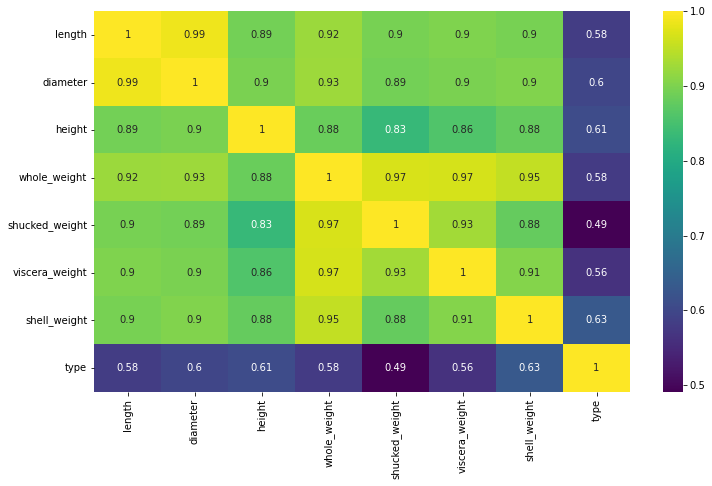

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot = True, cmap= 'viridis')

Removendo a variável 'length'

In [ ]:
df_teste = df
df_teste.drop('length',axis=1,inplace=True)
target = df_teste.pop('type')
df_teste

,sex,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,M,0.420,0.150,0.6995,0.2575,0.1530,0.2400
1,I,0.380,0.115,0.5155,0.2150,0.1135,0.1660
2,I,0.130,0.045,0.0290,0.0120,0.0075,0.0095
3,M,0.450,0.170,0.8100,0.3170,0.1570,0.2200
4,I,0.415,0.150,0.5765,0.3595,0.1350,0.2250
...,...,...,...,...,...,...,...
3127,F,0.405,0.175,0.9800,0.2585,0.2070,0.3800
3128,M,0.525,0.185,1.2590,0.4870,0.2215,0.4450
3129,I,0.340,0.120,0.4925,0.2410,0.1075,0.1200
3130,F,0.410,0.155,0.7270,0.2910,0.1835,0.2350


Alterando os valores de 'sex' para números 

In [ ]:
df['sex'] = df['sex'].replace('M', 1)
df['sex'] = df['sex'].replace('F', 2)
df['sex'] = df['sex'].replace('I', 3)
df['sex'].unique()

array([1, 3, 2])

# Testando e validando modelos 

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_teste, target, test_size = 0.33)

**KNN**

In [ ]:
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()
param_grid = {'metric' :['minkowski','euclidean','manhattan'], 
    'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn2, param_grid, scoring='accuracy', n_jobs = -1,cv=5)

knn_gscv.fit(df_teste, target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='accuracy')

In [ ]:
knn_gscv.best_params_

{'metric': 'manhattan', 'n_neighbors': 23}

In [ ]:
from sklearn import metrics
scores = []
k_range = range(1,40)


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

0.6566731141199227


Text(0, 0.5, 'Testing Accuracy')

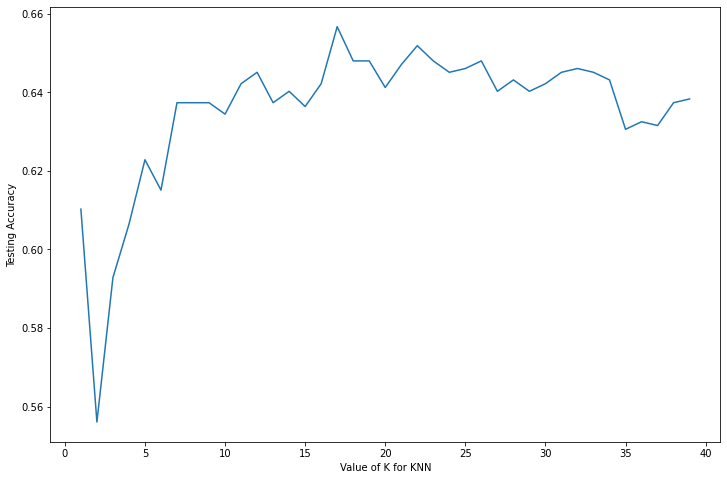

In [ ]:
plt.figure(figsize=(12,8))
print(max(scores))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
res_rf = rf.predict(x_test)
print(metrics.classification_report(y_test, res_rf))

              precision    recall  f1-score   support

           1       0.71      0.73      0.72       337
           2       0.55      0.49      0.52       352
           3       0.66      0.72      0.69       345

    accuracy                           0.64      1034
   macro avg       0.64      0.64      0.64      1034
weighted avg       0.64      0.64      0.64      1034



In [ ]:
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'n_estimators': [100, 200, 300, 1000]}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='accuracy',
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(df_teste, target)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [80, 90, 100, 110],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='accuracy', verbose=2)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.515416,0.006001,0.041566,0.002731,80,100,"{'max_depth': 80, 'n_estimators': 100}",0.656130,0.633142,0.662835,0.650702,0.012715,1
1,1.007691,0.008992,0.078675,0.005392,80,200,"{'max_depth': 80, 'n_estimators': 200}",0.654215,0.637931,0.658046,0.650064,0.008721,2
2,1.506586,0.017322,0.112373,0.002572,80,300,"{'max_depth': 80, 'n_estimators': 300}",0.659004,0.635057,0.648467,0.647510,0.009799,3
3,5.004943,0.006619,0.383384,0.013174,80,1000,"{'max_depth': 80, 'n_estimators': 1000}",0.645594,0.633142,0.649425,0.642720,0.006951,12
4,0.510724,0.012478,0.038600,0.000422,90,100,"{'max_depth': 90, 'n_estimators': 100}",0.639847,0.635057,0.645594,0.640166,0.004307,15
5,1.009974,0.005826,0.074925,0.000182,90,200,"{'max_depth': 90, 'n_estimators': 200}",0.651341,0.638889,0.652299,0.647510,0.006108,3
6,1.511946,0.004152,0.111753,0.000941,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.651341,0.635057,0.651341,0.645913,0.007676,9
7,5.055495,0.011610,0.368373,0.002577,90,1000,"{'max_depth': 90, 'n_estimators': 1000}",0.652299,0.632184,0.654215,0.646232,0.009965,7
8,0.508344,0.011110,0.038665,0.000311,100,100,"{'max_depth': 100, 'n_estimators': 100}",0.646552,0.625479,0.653257,0.641762,0.011835,14
9,1.002580,0.009026,0.075127,0.000334,100,200,"{'max_depth': 100, 'n_estimators': 200}",0.656130,0.639847,0.645594,0.647190,0.006743,5


In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=80)

In [ ]:
rf = RandomForestClassifier(max_depth=110, n_estimators=1000)
rf.fit(x_train, y_train)
res_rf = rf.predict(x_test)
print(metrics.classification_report(y_test, res_rf))

              precision    recall  f1-score   support

           1       0.73      0.72      0.72       337
           2       0.54      0.49      0.51       352
           3       0.66      0.72      0.69       345

    accuracy                           0.64      1034
   macro avg       0.64      0.64      0.64      1034
weighted avg       0.64      0.64      0.64      1034



In [ ]:
df_t = pd.read_csv('/content/abalone_app.csv')
df_t.drop('length', axis=1, inplace=True)
df_t

,sex,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,M,0.480,0.175,1.2290,0.4125,0.2735,0.4150
1,F,0.385,0.150,1.1185,0.5425,0.2445,0.2845
2,F,0.520,0.180,1.2850,0.5775,0.3520,0.3170
3,M,0.510,0.170,1.3715,0.5670,0.3070,0.4090
4,F,0.540,0.215,1.5555,0.6950,0.2960,0.4440
...,...,...,...,...,...,...,...
1040,I,0.350,0.105,0.3660,0.1705,0.0855,0.1100
1041,F,0.360,0.125,0.4470,0.1695,0.0810,0.1400
1042,F,0.405,0.150,0.5965,0.2530,0.1260,0.1850
1043,I,0.275,0.095,0.2425,0.1060,0.0485,0.2100


In [ ]:
df_t['sex'] = df_t['sex'].replace('M', 1)
df_t['sex'] = df_t['sex'].replace('F', 2)
df_t['sex'] = df_t['sex'].replace('I', 3)
df_t['sex'].unique()

array([1, 2, 3])

In [ ]:
"""knn = KNeighborsClassifier(n_neighbors=23,metric='manhattan')
knn.fit(df_teste, target)
y_pred = knn.predict(df_t)"""

"knn = KNeighborsClassifier(n_neighbors=23,metric='manhattan')\nknn.fit(df_teste, target)\ny_pred = knn.predict(df_t)"

In [ ]:
rf = RandomForestClassifier(max_depth=90, n_estimators=200)
rf.fit(df_teste, target)
y_pred = rf.predict(df_t)

In [ ]:
rf = RandomForestClassifier(os melhores parametros)
rf.fit(copy_X, copy_y)
y_pred = rf.predict(data_app)

In [ ]:
'''# Enviando previsões realizadas com o modelo para o servidor
URL = "https://aydanomachado.com/mlclass/03_Validation.php"

#TODO Substituir pela sua chave aqui
DEV_KEY = "Error 404"

# json para ser enviado para o servidor
data = {'dev_key':DEV_KEY,
        'predictions':pd.Series(y_pred).to_json(orient='values')}

# Enviando requisição e salvando o objeto resposta
r = requests.post(url = URL, data = data)

# Extraindo e imprimindo o texto da resposta
pastebin_url = r.text
print(" - Resposta do servidor:\n", r.text, "\n")'''

'# Enviando previsões realizadas com o modelo para o servidor\nURL = "https://aydanomachado.com/mlclass/03_Validation.php"\n\n#TODO Substituir pela sua chave aqui\nDEV_KEY = "Error 404"\n\n# json para ser enviado para o servidor\ndata = {\'dev_key\':DEV_KEY,\n        \'predictions\':pd.Series(y_pred).to_json(orient=\'values\')}\n\n# Enviando requisição e salvando o objeto resposta\nr = requests.post(url = URL, data = data)\n\n# Extraindo e imprimindo o texto da resposta\npastebin_url = r.text\nprint(" - Resposta do servidor:\n", r.text, "\n")'